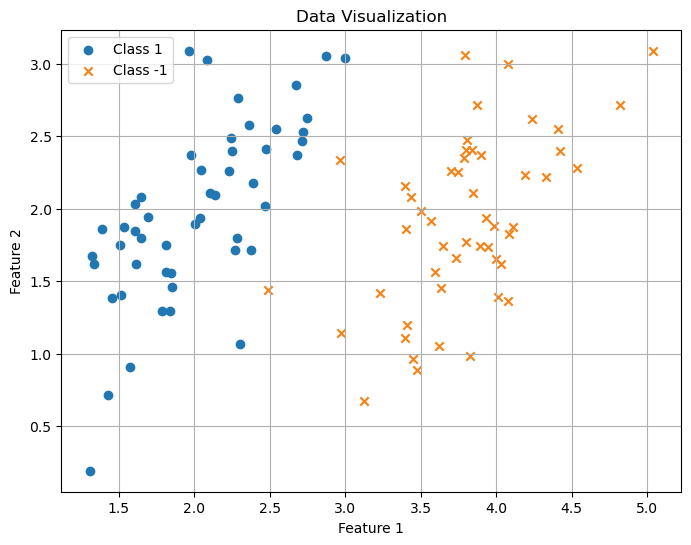

In [57]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 50
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1

X = np.concatenate((X0.T, X1.T), axis=1) # all data 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1) # labels 

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], marker='o', label='Class 1')
plt.scatter(X1[:, 0], X1[:, 1], marker='x', label='Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Visualization')
plt.legend()
plt.grid(True)
plt.show()


In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Your previous code for generating data
y1 = y.reshape((2*N,))
X1 = X.T # each sample is one row

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# SVM fitting
clf = SVC(kernel='linear', C=1e5) # just a big number 
clf.fit(X_train, y_train)

# Get support vectors
support_vectors = clf.support_vectors_
print("Number of support vectors:", len(support_vectors))

# Prediction on test set
y_pred = clf.predict(X_test)

# Accuracy on test set
accuracy = np.mean(y_pred == y_test) * 100
print("Accuracy on test set:", accuracy)




Number of support vectors: 3
Accuracy on test set: 95.0


In [59]:
# Assuming you have already trained your SVM model 'clf'

# Define the point you want to predict
new_point = np.array([[3.5, 3]])

# Predict the class of the new point
predicted_class = clf.predict(new_point)

if predicted_class == 1:
    print("Predicted class: Class 1")
else:
    print("Predicted class: Class -1")


Predicted class: Class -1


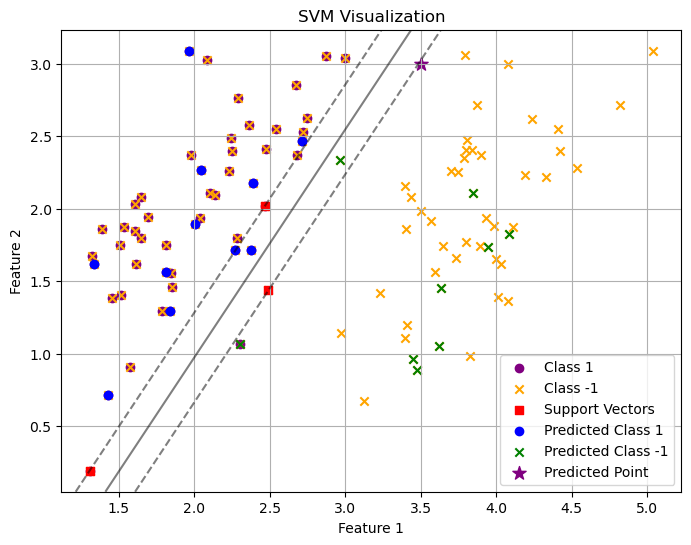

In [68]:
# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X0[:, 0], X0[:, 1], marker='o', color = 'purple', label='Class 1')
plt.scatter(X1[:, 0], X1[:, 1], marker='x', color = 'orange', label='Class -1')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], marker='s', color='red', label='Support Vectors')
plt.scatter(X_test[y_pred == 1][:, 0], X_test[y_pred == 1][:, 1], marker='o', color='blue', label='Predicted Class 1')
plt.scatter(X_test[y_pred == -1][:, 0], X_test[y_pred == -1][:, 1], marker='x', color='green', label='Predicted Class -1')
plt.scatter(new_point[0, 0], new_point[0, 1], marker='*', color='purple', s=100, label='Predicted Point')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Visualization')
plt.legend()
plt.grid(True)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])